In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
df = pd.read_csv('Data/matcheswithform.csv',index_col=0)
df.head()

,Season,Round,Home,Away,HomeGoals,AwayGoals,Result,HomePoints,AwayPoints,GoalsScored,HomeAdvantage,Home_RecentForm,Away_RecentForm
0,1959-1960,1,ADO Den Haag,Willem II,3,3,3,1,1,6,0,NaN,NaN
1,1959-1960,1,AFC Ajax,NAC Breda,3,0,1,3,0,3,3,NaN,NaN
2,1959-1960,1,Blauw Wit,Sittardia,5,2,1,3,0,7,3,NaN,NaN
3,1959-1960,1,USV Elinkwijk,MVV Maastricht,2,0,1,3,0,2,2,NaN,NaN
4,1959-1960,1,Feijenoord,Sparta Rotterdam,0,1,2,0,3,1,-1,NaN,NaN


In [48]:
standings_df = pd.read_csv('Data/final_standings.csv')
points_df = pd.read_csv('Data/final_points.csv')

standings_df.rename({'Unnamed: 0':'Team'},axis=1,inplace=True)

In [98]:
bigthree = standings_df[standings_df['Team'].isin(['AFC Ajax','Feyenoord','PSV'])]

bigthree = bigthree.transpose()

bigthree.columns = bigthree.iloc[0,:]

bigthree = bigthree.drop('Team')

bigthree = bigthree.astype(float)

In [99]:
bigthree = bigthree.reset_index().melt(id_vars='index')

In [100]:
bigthree

,index,Team,value
0,1959-1960,AFC Ajax,1.0
1,1960-1961,AFC Ajax,2.0
2,1961-1962,AFC Ajax,4.0
3,1962-1963,AFC Ajax,2.5
4,1963-1964,AFC Ajax,6.0
...,...,...,...
178,2015-2016,PSV,1.0
179,2016-2017,PSV,3.0
180,2017-2018,PSV,1.0
181,2018-2019,PSV,2.0


# Visualition final standing for tradition 'big three'

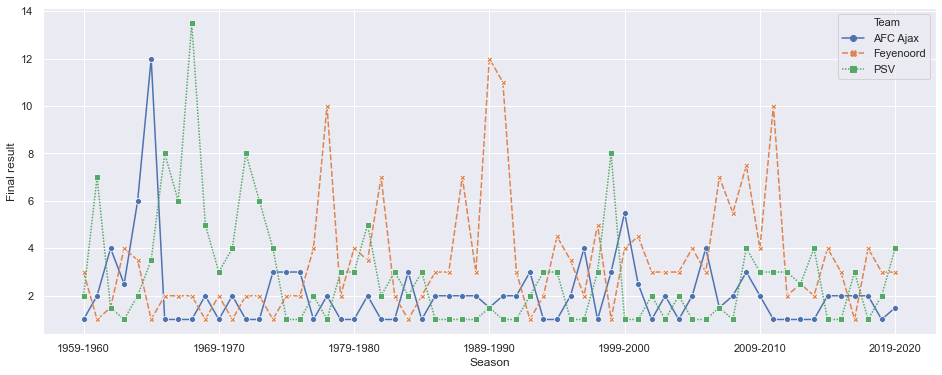

In [101]:
f, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x='index',y='value',hue='Team',style='Team',data=bigthree,ax=ax,markers=True)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.set_ylabel('Final result')
ax.set_xlabel('Season')
plt.show()

# Data Visualization

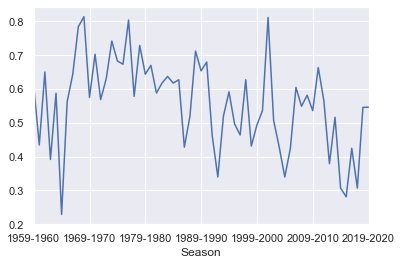

In [5]:
df.groupby('Season')['HomeAdvantage'].mean().plot()

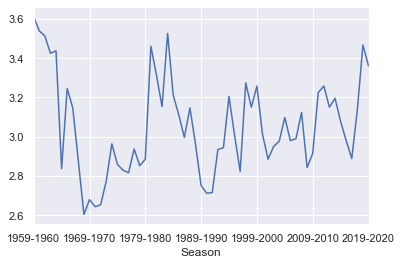

In [6]:
df.groupby('Season')['GoalsScored'].mean().plot()

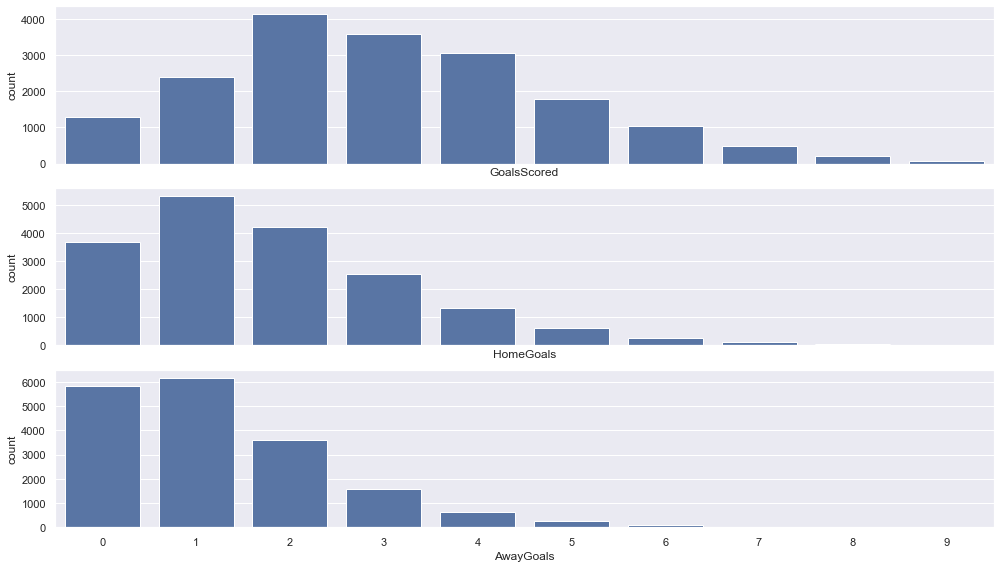

In [11]:
f,axes = plt.subplots(nrows=3,figsize=(14,8),sharex=True)
sns.countplot(df['GoalsScored'],ax=axes[0],color='b')
sns.countplot(x="HomeGoals",data=df,ax=axes[1],color='b')
sns.countplot(x="AwayGoals",data=df,ax=axes[2],color='b')
plt.tight_layout()
plt.show()